In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
import psycopg

def create_db_connections(db_configs):
    """
    Create and return connections to multiple PostgreSQL databases.
    
    :param db_configs: A list of dictionaries, where each dictionary contains
                       the database connection parameters.
                       Example:
                       [
                           {
                               "dbname": "db1",
                               "user": "user1",
                               "password": "password1",
                               "host": "localhost",
                               "port": "5432"
                           },
                           {
                               "dbname": "db2",
                               "user": "user2",
                               "password": "password2",
                               "host": "localhost",
                               "port": "5432"
                           }
                       ]
    :return: A dictionary where the key is the database name and the value is the connection object.
    """
    connections = {}
    for config in db_configs:
        try:
            conn = psycopg.connect(
                dbname=config['dbname'],
                user=config['user'],
                password=config['password'],
                host=config['host'],
                port=config['port']
            )
            connections[config['dbname']] = conn
            print(f"Connected to database {config['dbname']} successfully.")
        except psycopg.OperationalError as e:
            print(f"Error connecting to database {config['dbname']}: {e}")
    
    return connections

def close_db_connections(connections):
    """
    Close all the database connections.

    :param connections: Dictionary of database connections.
                        The keys should be the database names and the values should be the connection objects.
    """
    for dbname, conn in connections.items():
        conn.close()
        print(f"Connection to database {dbname} closed.")

# Example usage
db_configs = [
    {
        "dbname": "Employees",
        "user": "postgres",
        "password": "root",
        "host": "localhost",
        "port": "5432"
    },
    # {
    #     "dbname": "db2",
    #     "user": "user2",
    #     "password": "password2",
    #     "host": "localhost",
    #     "port": "5432"
    # }
]

connections = create_db_connections(db_configs)

# Perform operations using the connections

# Don't forget to close the connections when done
close_db_connections(connections)


Connected to database Employees successfully.
Connection to database Employees closed.


In [3]:
import psycopg

def create_db_connections(db_configs):
    connections = {}
    for config in db_configs:
        try:
            conn = psycopg.connect(
                dbname=config['dbname'],
                user=config['user'],
                password=config['password'],
                host=config['host'],
                port=config['port']
            )
            connections[config['dbname']] = conn
            print(f"Connected to database {config['dbname']} successfully.")
        except psycopg.OperationalError as e:
            print(f"Error connecting to database {config['dbname']}: {e}")
    
    return connections

def close_db_connections(connections):
    for dbname, conn in connections.items():
        conn.close()
        print(f"Connection to database {dbname} closed.")

def execute_query(connections, query, params=None):
    """
    Execute a SQL query on all connected databases.
    
    :param connections: Dictionary of database connections.
                        The keys should be the database names and the values should be the connection objects.
    :param query: The SQL query to execute.
    :param params: Optional parameters to pass with the query.
                   Use None if there are no parameters.
    :return: A dictionary with database names as keys and query results as values.
    """
    results = {}
    for dbname, conn in connections.items():
        try:
            with conn.cursor() as cursor:
                cursor.execute(query, params)
                if query.strip().lower().startswith("select"):
                    results[dbname] = cursor.fetchall()
                else:
                    conn.commit()
                    results[dbname] = f"Query executed successfully in {dbname}."
                print(f"Executed query on {dbname}.")
        except Exception as e:
            results[dbname] = f"Error executing query on {dbname}: {e}"
            print(f"Error executing query on {dbname}: {e}")
    
    return results

# Example usage
db_configs = [
    {
        "dbname": "Employees",
        "user": "postgres",
        "password": "root",
        "host": "localhost",
        "port": "5432"
    }
]



In [4]:
connections = create_db_connections(db_configs)

# Define your query and optional parameters
query = "SELECT version();"
results = execute_query(connections, query)

# Print the results
for dbname, result in results.items():
    print(f"Results from {dbname}: {result}")

# Don't forget to close the connections when done
close_db_connections(connections)


Connected to database Employees successfully.
Executed query on Employees.
Results from Employees: [('PostgreSQL 15.7 (Debian 15.7-0+deb12u1) on x86_64-pc-linux-gnu, compiled by gcc (Debian 12.2.0-14) 12.2.0, 64-bit',)]
Connection to database Employees closed.


In [5]:
# Establish database connections
connections = create_db_connections(db_configs)

try:
    # Execute a query and fetch results
    query = "SELECT version();"
    results = execute_query(connections, query)

    # Print the results
    for dbname, result in results.items():
        print(f"Results from {dbname}: {result}")

finally:
    # Ensure connections are closed even if an error occurs
    close_db_connections(connections)


Connected to database Employees successfully.
Executed query on Employees.
Results from Employees: [('PostgreSQL 15.7 (Debian 15.7-0+deb12u1) on x86_64-pc-linux-gnu, compiled by gcc (Debian 12.2.0-14) 12.2.0, 64-bit',)]
Connection to database Employees closed.


In [6]:
def run_query_across_databases(db_configs, query, params=None):
    """
    Execute a query across multiple databases and return the results.
    
    :param db_configs: List of dictionaries containing database connection parameters.
    :param query: SQL query to be executed.
    :param params: Optional parameters for the SQL query.
    :return: A dictionary with database names as keys and query results as values.
    """
    # Establish database connections
    connections = create_db_connections(db_configs)

    try:
        # Execute the query and fetch results
        results = execute_query(connections, query, params)
        
        # Print the results
        for dbname, result in results.items():
            print(f"Results from {dbname}: {result}")
        
        return results
    finally:
        # Ensure connections are closed even if an error occurs
        close_db_connections(connections)

In [7]:

def run_query_across_databases(db_configs, query, params=None):
    """
    Execute a query across multiple databases and return the results as a pandas DataFrame.
    
    :param db_configs: List of dictionaries containing database connection parameters.
    :param query: SQL query to be executed.
    :param params: Optional parameters for the SQL query.
    :return: A pandas DataFrame with the combined results from all databases.
             The DataFrame includes a column for the database name.
    """
    # Establish database connections
    connections = create_db_connections(db_configs)

    try:
        # List to hold individual DataFrames from each database
        dfs = []

        # Execute the query and fetch results
        results = execute_query(connections, query, params)

        # Convert each result to a DataFrame and add a column for the database name
        for dbname, result in results.items():
            if isinstance(result, list) and result:
                df = pd.DataFrame(result)
                df['database'] = dbname
                dfs.append(df)
            else:
                print(f"No data returned from {dbname} or an error occurred.")

        # Concatenate all DataFrames into a single DataFrame
        combined_df = pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()

        return combined_df
    finally:
        # Ensure connections are closed even if an error occurs
        close_db_connections(connections)


In [8]:
# Run the function with a sample query
query = "SELECT * FROM employees LIMIT 400000;"  # Adjust the query as needed
df = run_query_across_databases(db_configs, query)

# Display the combined DataFrame
# print(df)
print(df[100000:150000])

Connected to database Employees successfully.
Executed query on Employees.
Connection to database Employees closed.
             0           1           2             3  4           5   database
100000  110022  1956-09-12   Margareta    Markovitch  M  1985-01-01  Employees
100001  110039  1963-06-21    Vishwani      Minakawa  M  1986-04-12  Employees
100002  110085  1959-10-28        Ebru         Alpin  M  1985-01-01  Employees
100003  110114  1957-03-28       Isamu    Legleitner  F  1985-01-14  Employees
100004  110183  1953-06-24     Shirish  Ossenbruggen  F  1985-01-01  Employees
...        ...         ...         ...           ... ..         ...        ...
149995  249971  1954-02-16  Christoper       Tzvieli  M  1987-04-17  Employees
149996  249972  1954-03-02       Jinxi          Peck  M  1985-10-03  Employees
149997  249973  1963-01-06     Youjian      Spinelli  M  1985-09-08  Employees
149998  249974  1960-06-15        Duri        Brobst  M  1987-01-13  Employees
149999  249975 

In [9]:
query = "SELECT * FROM departments LIMIT 400000;"  # Adjust the query as needed
df = run_query_across_databases(db_configs, query)

# Display the combined DataFrame
print(df)

Connected to database Employees successfully.
Executed query on Employees.
Connection to database Employees closed.
      0                   1   database
0  d001           Marketing  Employees
1  d002             Finance  Employees
2  d003     Human Resources  Employees
3  d004          Production  Employees
4  d005         Development  Employees
5  d006  Quality Management  Employees
6  d007               Sales  Employees
7  d008            Research  Employees
8  d009    Customer Service  Employees


In [10]:
query = "SELECT * FROM salaries;"  # Adjust the query as needed
df = run_query_across_databases(db_configs, query)

# Display the combined DataFrame
print(df)

Connected to database Employees successfully.
Executed query on Employees.
Connection to database Employees closed.
              0      1           2           3   database
0        299664  64921  2001-04-20  2002-04-20  Employees
1        299664  66285  2002-04-20  9999-01-01  Employees
2        299665  72140  1997-04-18  1998-04-18  Employees
3        299665  71865  1998-04-18  1999-04-18  Employees
4        299665  73336  1999-04-18  2000-04-17  Employees
...         ...    ...         ...         ...        ...
2844042  299664  57569  1996-04-21  1997-04-21  Employees
2844043  299664  57099  1997-04-21  1998-04-21  Employees
2844044  299664  58838  1998-04-21  1999-04-21  Employees
2844045  299664  59692  1999-04-21  2000-04-20  Employees
2844046  299664  62800  2000-04-20  2001-04-20  Employees

[2844047 rows x 5 columns]


In [11]:
import pandas as pd
import psycopg

def fetch_column_names(conn, table_name):
    """
    Fetch the column names for a given table.
    
    :param conn: A psycopg connection object.
    :param table_name: The name of the table to fetch column names from.
    :return: A list of column names.
    """
    query = f"""
    SELECT column_name
    FROM information_schema.columns
    WHERE table_name = '{table_name}'
    ORDER BY ordinal_position;
    """
    with conn.cursor() as cursor:
        cursor.execute(query)
        columns = [row[0] for row in cursor.fetchall()]
    return columns

def run_query_with_dynamic_columns(db_configs, table_name, user_query, params=None):
    """
    Execute a user query across multiple databases and return the results as a pandas DataFrame.
    
    :param db_configs: List of dictionaries containing database connection parameters.
    :param table_name: The table name to fetch column names from.
    :param user_query: SQL query provided by the user.
    :param params: Optional parameters for the SQL query.
    :return: A pandas DataFrame with the combined results from all databases.
             The DataFrame includes a column for the database name.
    """
    # Establish database connections
    connections = create_db_connections(db_configs)

    try:
        # List to hold individual DataFrames from each database
        dfs = []

        # For each database, fetch column names and execute the user query
        for dbname, conn in connections.items():
            try:
                column_names = fetch_column_names(conn, table_name)

                # Execute the user query and fetch results
                with conn.cursor() as cursor:
                    cursor.execute(user_query, params)
                    result = cursor.fetchall()

                # Convert the result to a DataFrame with fetched column names
                if result:
                    df = pd.DataFrame(result, columns=column_names)
                    df['database'] = dbname
                    dfs.append(df)
                else:
                    print(f"No data returned from {dbname}.")

            except Exception as e:
                print(f"Error in {dbname}: {e}")
        
        # Concatenate all DataFrames into a single DataFrame
        combined_df = pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()

        return combined_df
    finally:
        # Ensure connections are closed even if an error occurs
        close_db_connections(connections)

# Example usage
db_configs = [
    {
        "dbname": "Employees",
        "user": "postgres",
        "password": "root",
        "host": "localhost",
        "port": "5432"
    },

]


In [12]:

# Define the table name and the user's query
table_name = "salaries"  # Replace with your table name
user_query = "SELECT * FROM salaries;"  # Adjust the query as needed

# Run the function with the user query
df = run_query_with_dynamic_columns(db_configs, table_name, user_query)

# Display the combined DataFrame
print(df)


Connected to database Employees successfully.
Connection to database Employees closed.
         emp_no  salary   from_date     to_date   database
0        299664   64921  2001-04-20  2002-04-20  Employees
1        299664   66285  2002-04-20  9999-01-01  Employees
2        299665   72140  1997-04-18  1998-04-18  Employees
3        299665   71865  1998-04-18  1999-04-18  Employees
4        299665   73336  1999-04-18  2000-04-17  Employees
...         ...     ...         ...         ...        ...
2844042  299664   57569  1996-04-21  1997-04-21  Employees
2844043  299664   57099  1997-04-21  1998-04-21  Employees
2844044  299664   58838  1998-04-21  1999-04-21  Employees
2844045  299664   59692  1999-04-21  2000-04-20  Employees
2844046  299664   62800  2000-04-20  2001-04-20  Employees

[2844047 rows x 5 columns]


In [13]:

# Define the table name and the user's query
table_name = "salaries"  # Replace with your table name
user_query = """SELECT * FROM salaries WHERE emp_no = 10001;"""  # Adjust the query as needed

# Run the function with the user query
df = run_query_with_dynamic_columns(db_configs, table_name, user_query)

# Display the combined DataFrame
print(df)


Connected to database Employees successfully.
Connection to database Employees closed.
    emp_no  salary   from_date     to_date   database
0    10001   60117  1986-06-26  1987-06-26  Employees
1    10001   62102  1987-06-26  1988-06-25  Employees
2    10001   66074  1988-06-25  1989-06-25  Employees
3    10001   66596  1989-06-25  1990-06-25  Employees
4    10001   66961  1990-06-25  1991-06-25  Employees
5    10001   71046  1991-06-25  1992-06-24  Employees
6    10001   74333  1992-06-24  1993-06-24  Employees
7    10001   75286  1993-06-24  1994-06-24  Employees
8    10001   75994  1994-06-24  1995-06-24  Employees
9    10001   76884  1995-06-24  1996-06-23  Employees
10   10001   80013  1996-06-23  1997-06-23  Employees
11   10001   81025  1997-06-23  1998-06-23  Employees
12   10001   81097  1998-06-23  1999-06-23  Employees
13   10001   84917  1999-06-23  2000-06-22  Employees
14   10001   85112  2000-06-22  2001-06-22  Employees
15   10001   85097  2001-06-22  2002-06-22  Emplo

In [14]:
# Define the table name and the user's query
table_name = "salaries"  # Replace with your table name
user_query = "SELECT * FROM salaries ORDER BY emp_no ASC;"

# Run the function with the user query
df = run_query_with_dynamic_columns(db_configs, table_name, user_query)

# Display the combined DataFrame
print(df)

Connected to database Employees successfully.
Connection to database Employees closed.
         emp_no  salary   from_date     to_date   database
0         10001   60117  1986-06-26  1987-06-26  Employees
1         10001   62102  1987-06-26  1988-06-25  Employees
2         10001   66074  1988-06-25  1989-06-25  Employees
3         10001   66596  1989-06-25  1990-06-25  Employees
4         10001   66961  1990-06-25  1991-06-25  Employees
...         ...     ...         ...         ...        ...
2844042  499999   63707  1997-11-30  1998-11-30  Employees
2844043  499999   67043  1998-11-30  1999-11-30  Employees
2844044  499999   70745  1999-11-30  2000-11-29  Employees
2844045  499999   74327  2000-11-29  2001-11-29  Employees
2844046  499999   77303  2001-11-29  9999-01-01  Employees

[2844047 rows x 5 columns]


In [15]:
import pandas as pd
import psycopg

def fetch_column_names(conn, table_name):
    """
    Fetch the column names for a given table.
    
    :param conn: A psycopg connection object.
    :param table_name: The name of the table to fetch column names from.
    :return: A list of column names.
    """
    query = f"""
    SELECT column_name
    FROM information_schema.columns
    WHERE table_name = '{table_name}'
    ORDER BY ordinal_position;
    """
    with conn.cursor() as cursor:
        cursor.execute(query)
        columns = [row[0] for row in cursor.fetchall()]
    return columns

def run_query_with_dynamic_columns(db_configs, table_name, user_query, params=None):
    """
    Execute a user query across multiple databases and return the results as a pandas DataFrame.
    
    :param db_configs: List of dictionaries containing database connection parameters.
    :param table_name: The table name to fetch column names from.
    :param user_query: SQL query provided by the user.
    :param params: Optional parameters for the SQL query.
    :return: A pandas DataFrame with the combined results from all databases.
             The DataFrame includes a column for the database name.
    """
    # Establish database connections
    connections = create_db_connections(db_configs)

    try:
        # List to hold individual DataFrames from each database
        dfs = []

        # For each database, fetch column names and execute the user query
        for dbname, conn in connections.items():
            try:
                column_names = fetch_column_names(conn, table_name)

                # Execute the user query and fetch results
                with conn.cursor() as cursor:
                    cursor.execute(user_query, params)
                    result = cursor.fetchall()

                # Debugging: Print the raw results
                print(f"Raw results from {dbname}: {result[:5]}")  # Print first 5 rows for inspection

                # Convert the result to a DataFrame with fetched column names
                if result:
                    if len(result[0]) != len(column_names):
                        raise ValueError(f"Number of columns in result from {dbname} does not match the provided column names.")
                    
                    df = pd.DataFrame(result, columns=column_names)
                    df['database'] = dbname
                    dfs.append(df)
                else:
                    print(f"No data returned from {dbname}.")

            except Exception as e:
                print(f"Error in {dbname}: {e}")
        
        # Concatenate all DataFrames into a single DataFrame
        combined_df = pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()

        return combined_df
    finally:
        # Ensure connections are closed even if an error occurs
        close_db_connections(connections)

# Example usage
db_configs = [
    {
        "dbname": "Employees",
        "user": "postgres",
        "password": "root",
        "host": "localhost",
        "port": "5432"
    }
]

# Define the table name and the user's query
table_name = "employees"  # Replace with your table name
user_query = "SELECT * FROM employees ORDER BY emp_no ASC;"  # Adjust the query as needed

# Run the function with the user query
df = run_query_with_dynamic_columns(db_configs, table_name, user_query)

# Display the combined DataFrame
print(df)


Connected to database Employees successfully.
Raw results from Employees: [(10001, datetime.date(1953, 9, 2), 'Georgi', 'Facello', 'M', datetime.date(1986, 6, 26)), (10002, datetime.date(1964, 6, 2), 'Bezalel', 'Simmel', 'F', datetime.date(1985, 11, 21)), (10003, datetime.date(1959, 12, 3), 'Parto', 'Bamford', 'M', datetime.date(1986, 8, 28)), (10004, datetime.date(1954, 5, 1), 'Chirstian', 'Koblick', 'M', datetime.date(1986, 12, 1)), (10005, datetime.date(1955, 1, 21), 'Kyoichi', 'Maliniak', 'M', datetime.date(1989, 9, 12))]
Connection to database Employees closed.
        emp_no  birth_date first_name last_name gender   hire_date   database
0        10001  1953-09-02     Georgi   Facello      M  1986-06-26  Employees
1        10002  1964-06-02    Bezalel    Simmel      F  1985-11-21  Employees
2        10003  1959-12-03      Parto   Bamford      M  1986-08-28  Employees
3        10004  1954-05-01  Chirstian   Koblick      M  1986-12-01  Employees
4        10005  1955-01-21    Kyoichi

In [16]:
import pandas as pd
import psycopg

def fetch_column_names(conn, table_name):
    """
    Fetch the column names for a given table.
    
    :param conn: A psycopg connection object.
    :param table_name: The name of the table to fetch column names from.
    :return: A list of column names.
    """
    query = f"""
    SELECT column_name
    FROM information_schema.columns
    WHERE table_name = '{table_name}'
    ORDER BY ordinal_position;
    """
    with conn.cursor() as cursor:
        cursor.execute(query)
        columns = [row[0] for row in cursor.fetchall()]
    return columns

def fetch_data_in_chunks(conn, query, chunk_size=10000, params=None):
    """
    Fetch data in chunks to handle large datasets.
    
    :param conn: A psycopg connection object.
    :param query: SQL query to execute.
    :param chunk_size: Number of rows to fetch per chunk.
    :param params: Optional parameters for the SQL query.
    :return: A generator that yields chunks of data.
    """
    offset = 0
    while True:
        chunk_query = f"{query} LIMIT {chunk_size} OFFSET {offset};"
        with conn.cursor() as cursor:
            cursor.execute(chunk_query, params)
            data = cursor.fetchall()
            if not data:
                break
            yield data
            offset += chunk_size

def run_query_with_dynamic_columns(db_configs, table_name, user_query, chunk_size=10000, params=None):
    """
    Execute a user query across multiple databases and return the results as a pandas DataFrame.
    
    :param db_configs: List of dictionaries containing database connection parameters.
    :param table_name: The table name to fetch column names from.
    :param user_query: SQL query provided by the user.
    :param chunk_size: Number of rows to fetch per chunk.
    :param params: Optional parameters for the SQL query.
    :return: A pandas DataFrame with the combined results from all databases.
             The DataFrame includes a column for the database name.
    """
    # Establish database connections
    connections = create_db_connections(db_configs)

    try:
        # List to hold individual DataFrames from each database
        dfs = []

        # For each database, fetch column names and execute the user query
        for dbname, conn in connections.items():
            try:
                column_names = fetch_column_names(conn, table_name)

                # Fetch data in chunks and append to DataFrames list
                for chunk in fetch_data_in_chunks(conn, user_query, chunk_size, params):
                    if chunk:
                        if len(chunk[0]) != len(column_names):
                            raise ValueError(f"Number of columns in result from {dbname} does not match the provided column names.")
                        
                        df = pd.DataFrame(chunk, columns=column_names)
                        df['database'] = dbname
                        dfs.append(df)
                    else:
                        print(f"No data returned from {dbname}.")

            except Exception as e:
                print(f"Error in {dbname}: {e}")
        
        # Concatenate all DataFrames into a single DataFrame
        combined_df = pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()

        return combined_df
    finally:
        # Ensure connections are closed even if an error occurs
        close_db_connections(connections)

# Example usage
db_configs = [
    {
        "dbname": "Employees",
        "user": "postgres",
        "password": "root",
        "host": "localhost",
        "port": "5432"
    }
]


In [34]:

# Define the table name and the user's query
table_name = "employees"  # Replace with your table name
user_query = "SELECT * FROM employees ORDER BY emp_no ASC"  # Adjust the query as needed

# Run the function with the user query
df = run_query_with_dynamic_columns(db_configs, table_name, user_query)

# Display the combined DataFrame
print(df)


Connected to database Employees successfully.
Connection to database Employees closed.
        emp_no  birth_date first_name last_name gender   hire_date   database
0        10001  1953-09-02     Georgi   Facello      M  1986-06-26  Employees
1        10002  1964-06-02    Bezalel    Simmel      F  1985-11-21  Employees
2        10003  1959-12-03      Parto   Bamford      M  1986-08-28  Employees
3        10004  1954-05-01  Chirstian   Koblick      M  1986-12-01  Employees
4        10005  1955-01-21    Kyoichi  Maliniak      M  1989-09-12  Employees
...        ...         ...        ...       ...    ...         ...        ...
300019  499995  1958-09-24     Dekang  Lichtner      F  1993-01-12  Employees
300020  499996  1953-03-07       Zito      Baaz      M  1990-09-27  Employees
300021  499997  1961-08-03    Berhard    Lenart      M  1986-04-21  Employees
300022  499998  1956-09-05   Patricia   Breugel      M  1993-10-13  Employees
300023  499999  1958-05-01     Sachin   Tsukuda      M 

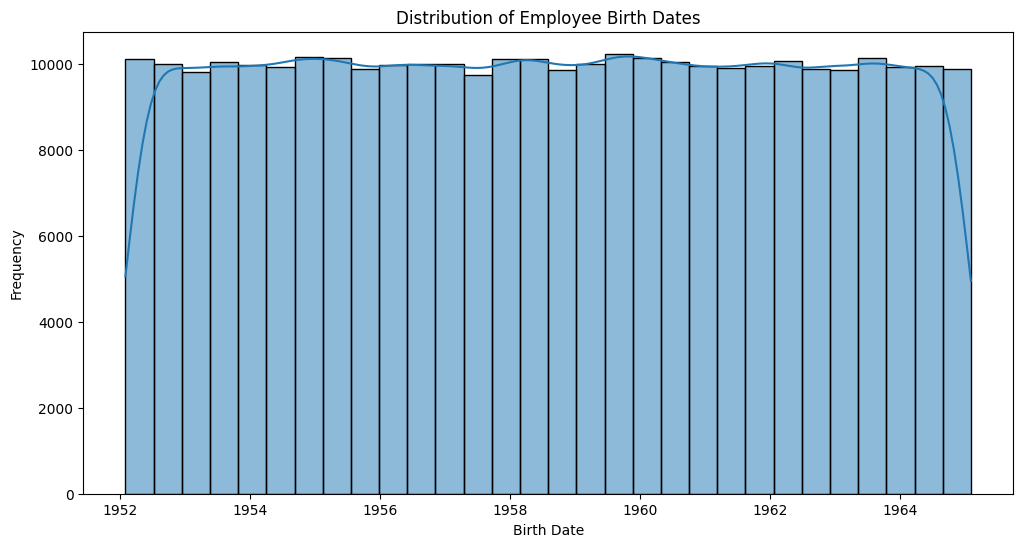

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'birth_date' to datetime if not already
df['birth_date'] = pd.to_datetime(df['birth_date'])

plt.figure(figsize=(12, 6))
sns.histplot(df['birth_date'], bins=30, kde=True)
plt.title('Distribution of Employee Birth Dates')
plt.xlabel('Birth Date')
plt.ylabel('Frequency')
plt.show()


/tmp/ipykernel_34622/970753337.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='Set2')


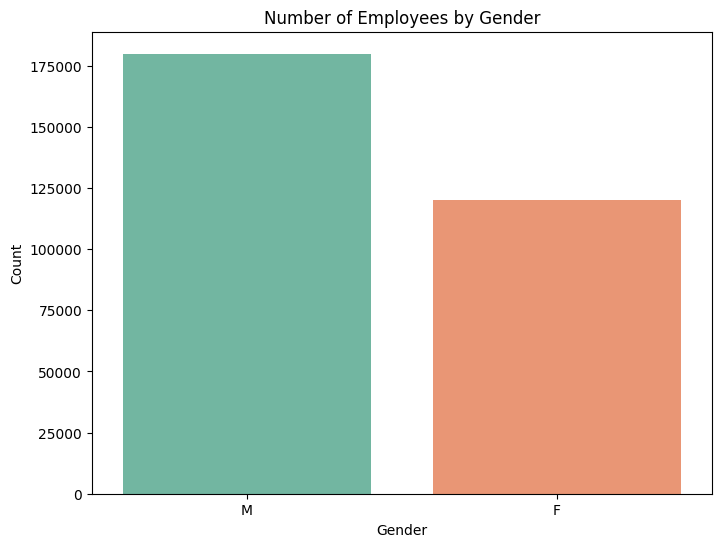

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', palette='Set2')
plt.title('Number of Employees by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


/tmp/ipykernel_34622/1612874142.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='hire_year', palette='viridis')


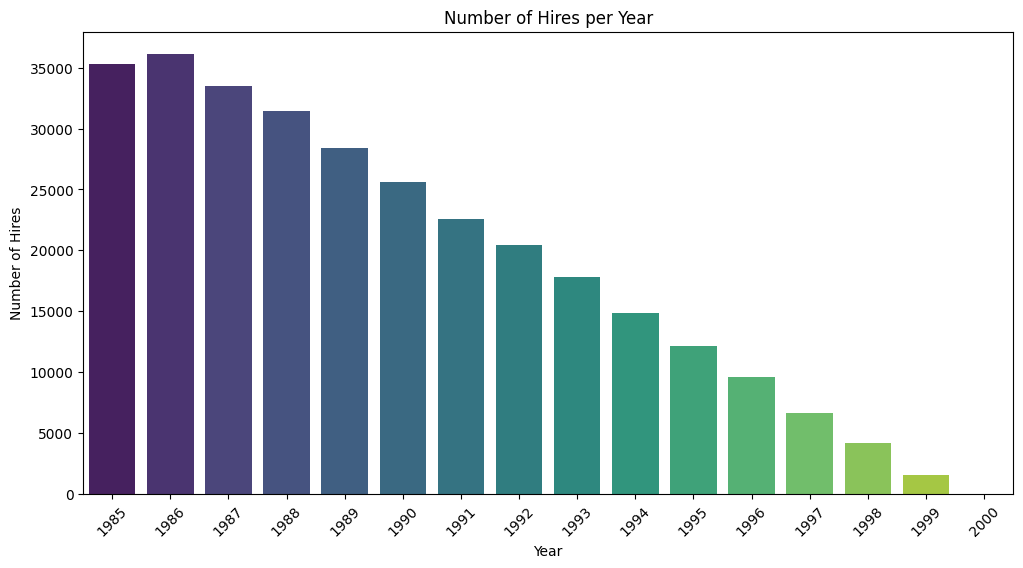

In [37]:
# Convert 'hire_date' to datetime if not already
df['hire_date'] = pd.to_datetime(df['hire_date'])

# Extract year for aggregation
df['hire_year'] = df['hire_date'].dt.year

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='hire_year', palette='viridis')
plt.title('Number of Hires per Year')
plt.xlabel('Year')
plt.ylabel('Number of Hires')
plt.xticks(rotation=45)
plt.show()


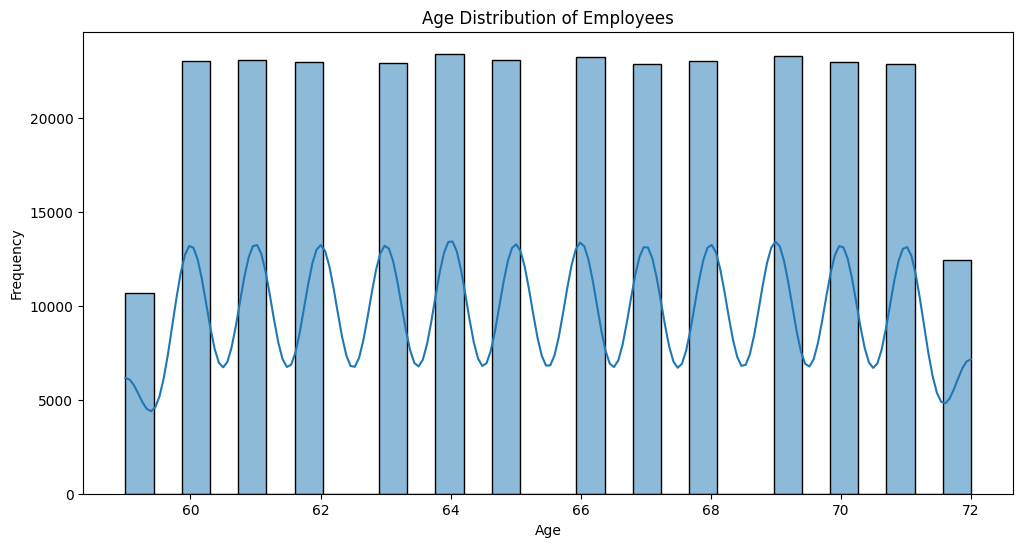

In [39]:
df['birth_date'] = pd.to_datetime(df['birth_date'])

# Calculate age
current_date = pd.to_datetime('today')
df['age'] = current_date.year - df['birth_date'].dt.year

# Adjust age for whether the birthday has occurred this year
df['age'] = df.apply(lambda row: row['age'] - 1 if (current_date.month, current_date.day) < (row['birth_date'].month, row['birth_date'].day) else row['age'], axis=1)

# Plot
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

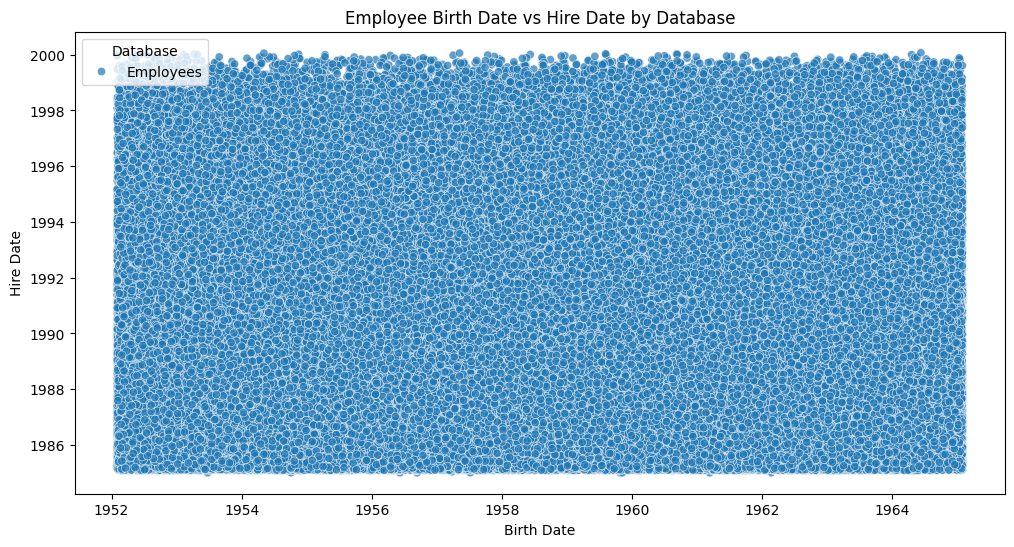

In [40]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='birth_date', y='hire_date', hue='database', palette='tab10', alpha=0.7)
plt.title('Employee Birth Date vs Hire Date by Database')
plt.xlabel('Birth Date')
plt.ylabel('Hire Date')
plt.legend(title='Database')
plt.show()
